# Problem Statement
## Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.


In [1]:
#importing Librarties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df_train=pd.read_csv("TRAIN.csv")
df_test=pd.read_csv("TEST_FINAL.csv")

In [3]:
#Shape of data
df_train.shape

(188340, 10)

we can see data has 188340 rows and 10 columns

In [4]:
#Display column info of dataset 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
ID               188340 non-null object
Store_id         188340 non-null int64
Store_Type       188340 non-null object
Location_Type    188340 non-null object
Region_Code      188340 non-null object
Date             188340 non-null object
Holiday          188340 non-null int64
Discount         188340 non-null object
#Order           188340 non-null int64
Sales            188340 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
#Printing 1st 5 rows
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
df_train["Store_Type"].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [7]:
df_train["Location_Type"].unique()

array(['L3', 'L2', 'L1', 'L5', 'L4'], dtype=object)

In [8]:
df_train["Region_Code"].unique()

array(['R1', 'R4', 'R2', 'R3'], dtype=object)

In [9]:
#Checking null values
df_train.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

No null values are present in dataset

In [10]:
#Checking duplicate values
df_train.duplicated().sum()

0

No duplicate values are present in dataset

In [11]:
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


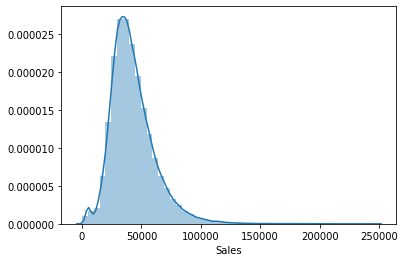

In [12]:
#Distribution of sales 
sns.distplot(df_train["Sales"])

In [13]:
#Converting Date column data type
df_train['Date']=df_train['Date'].astype('datetime64[ns]')

In [14]:
df_train.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
dtype: object

In [15]:
#Splitting date column into 3 columns - date, month, year
df_train['day'] = df_train["Date"].map(lambda x: x.day)

In [16]:
df_train['month'] = df_train["Date"].map(lambda x: x.month)
df_train['year'] = df_train["Date"].map(lambda x: x.year)


In [17]:
df_train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,day,month,year
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,31,5,2019
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,31,5,2019
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,31,5,2019
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,31,5,2019
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00,31,5,2019


In [18]:
df_train.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
#Order                    int64
Sales                   float64
day                       int64
month                     int64
year                      int64
dtype: object

In [19]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder 
label_encoder = preprocessing.LabelEncoder()

df_train['Store_Type']= label_encoder.fit_transform(df_train['Store_Type'])
df_train['Location_Type']= label_encoder.fit_transform(df_train['Location_Type'])
df_train['Region_Code']= label_encoder.fit_transform(df_train['Region_Code'])
df_train['Discount']= label_encoder.fit_transform(df_train['Discount'])

df_train['Discount'].unique()

array([1, 0], dtype=int64)

In [20]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,day,month,year
0,T1000001,1,0,2,0,2018-01-01,1,1,9,7011.84,1,1,2018
1,T1000002,253,3,1,0,2018-01-01,1,1,60,51789.12,1,1,2018
2,T1000003,252,2,1,0,2018-01-01,1,1,42,36868.20,1,1,2018
3,T1000004,251,1,2,0,2018-01-01,1,1,23,19715.16,1,1,2018
4,T1000005,250,1,2,3,2018-01-01,1,1,62,45614.52,1,1,2018


In [177]:
X=df_train.drop(["ID","Date","#Order","Sales"],axis=1)


In [178]:
y=df_train["Sales"]

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)

In [29]:
lr.score(X_test, y_test)

0.4260968932236706

In [87]:
from sklearn import metrics

In [31]:
lr.score(X_train,y_train)

0.4307636710667254

In [32]:
MSLE= metrics.mean_squared_log_error(y_test,y_pred)
msle = MSLE*1000
print(" Mean Squared LogError:",msle)

 Mean Squared LogError: 135.7264214636792


# 2. RandomForestRegressor 

In [33]:
#importing Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [34]:
#Creating model
rfr = RandomForestRegressor(max_depth=20,n_estimators=150,max_features="auto",min_samples_leaf=3)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=150)

In [35]:
#Predicting model
y_pred_rfr=rfr.predict(X_test)

In [36]:
rfr.score(X_test, y_test)

0.7490760940750415

In [37]:
rfr.score(X_train, y_train)

0.8553171803531698

In [38]:
#Calculating msle
MSLE= metrics.mean_squared_log_error(y_test,y_pred_rfr)
final = MSLE*1000
print("Msle:",final)

Msle: 50.05583555470782


# 3. XGBOOST

In [181]:
from xgboost import XGBRegressor

In [188]:
xgboost = XGBRegressor(n_estimators=700, max_depth=16,learning_rate =0.01,min_child_weight=0.5, 
    colsample_bytree=0.8,subsample=0.8,gamma=0.01)

In [189]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=16,
             min_child_weight=0.5, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
y_pred_xg = xgboost.predict(X_test)

In [191]:
xgboost.score(X_test, y_test)

0.8368058509488636

In [192]:
xgboost.score(X_train, y_train)

0.9428274753151983

In [193]:
#Calculating msle
MSLE= metrics.mean_squared_log_error(y_test,y_pred_xg)
final = MSLE*1000
print("Msle:",final)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

As MSLE of random forest regressor is less we choose that as best model and apply to test data

# Preparing test data

In [163]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,day,month,year
0,T1188341,171,3,1,2,2019-06-01,0,0,1,6,2019
1,T1188342,172,0,0,0,2019-06-01,0,0,1,6,2019
2,T1188343,173,3,1,0,2019-06-01,0,0,1,6,2019
3,T1188344,174,0,0,3,2019-06-01,0,0,1,6,2019
4,T1188345,170,0,0,1,2019-06-01,0,0,1,6,2019


In [164]:
df_test['Date']=df_test['Date'].astype('datetime64[ns]')

In [165]:
df_test['day'] = df_test["Date"].map(lambda x: x.day)
df_test['month'] = df_test["Date"].map(lambda x: x.month)
df_test['year'] = df_test["Date"].map(lambda x: x.year)

In [166]:
df_test['Store_Type']= label_encoder.fit_transform(df_test['Store_Type'])
df_test['Location_Type']= label_encoder.fit_transform(df_test['Location_Type'])
df_test['Region_Code']= label_encoder.fit_transform(df_test['Region_Code'])
df_test['Discount']= label_encoder.fit_transform(df_test['Discount'])

In [167]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,day,month,year
0,T1188341,171,3,1,2,2019-06-01,0,0,1,6,2019
1,T1188342,172,0,0,0,2019-06-01,0,0,1,6,2019
2,T1188343,173,3,1,0,2019-06-01,0,0,1,6,2019
3,T1188344,174,0,0,3,2019-06-01,0,0,1,6,2019
4,T1188345,170,0,0,1,2019-06-01,0,0,1,6,2019


In [168]:
Xt=df_test.drop(["ID","Date","year"],axis=1)

In [169]:
Xt.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,day,month
0,171,3,1,2,0,0,1,6
1,172,0,0,0,0,0,1,6
2,173,3,1,0,0,0,1,6
3,174,0,0,3,0,0,1,6
4,170,0,0,1,0,0,1,6


In [170]:
yt=xgboost.predict(Xt)

In [171]:
#Storing result in csv
submission = pd.read_csv('SAMPLE.csv')
submission['Sales'] = yt
submission.to_csv('my_submission5.csv', index=False)